In [1]:
import librosa
import IPython
import music21 as mu
from midi2audio import FluidSynth

# update music21 environment so it can find MuseScore
mu.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')

# utility function for sound playback
def create_sound_file_from_midi(m21_data, file_name):
    m21_data.write('midi', fp = file_name + ".mid")
    fs = FluidSynth()
    fs.midi_to_audio('./' + file_name + ".mid", file_name + '.mp3')
    return(IPython.display.Audio("./" + file_name + ".mp3"))

In [3]:
mahler_ex = mu.converter.parse("./MidiFiles/MahlerSymphonies/symphony1/1st-movement-Langsam-Schleppend-Immer-sehr-gemachlich.mxl")

In [4]:
bach_ex = mu.corpus.parse('bach/bwv57.8')

In [5]:
len(mahler_ex[9])

552

In [6]:
len(bach_ex.getElementsByClass(mu.stream.Part))

4

In [7]:
len(mahler_ex.getElementsByClass(mu.stream.Part))

30

In [8]:
len(bach_ex.getElementsByClass(mu.stream.Part)[0].getElementsByClass(mu.stream.Measure))

13

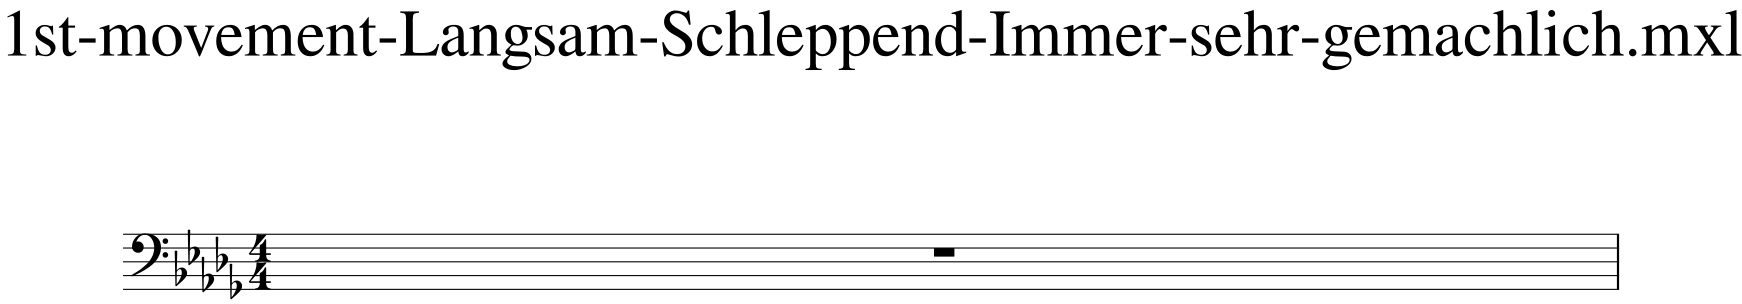

In [9]:
alto = mahler_ex.parts[9]  # parts count from zero, so soprano is 0 and alto is 1
excerpt = alto.measures(50, 51)
excerpt.show()


In [10]:
#mahler_ex.getElementsByClass(mu.stream.Part)[0].show('text')[0:1][9]

In [11]:
len(mahler_ex.flatten().getElementsByClass(mu.note.Note))

14855

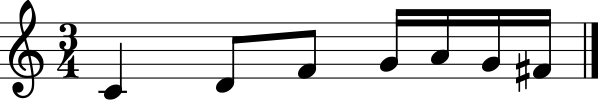

In [12]:
example_2 = mu.converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
example_2.show()

In [13]:
note1 = mu.note.Note("C4")
note1.duration.quarterLength = 2
note2 = mu.note.Note("F#4")
note2.duration.quarterLength

1.0

In [14]:
note1.duration.quarterLength

2.0

In [15]:
stream1 = mu.stream.Stream()
stream1.append([note1, note2])

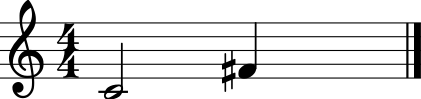

In [16]:
stream1.show()

In [30]:
b = mu.corpus.parse('bwv66.6')

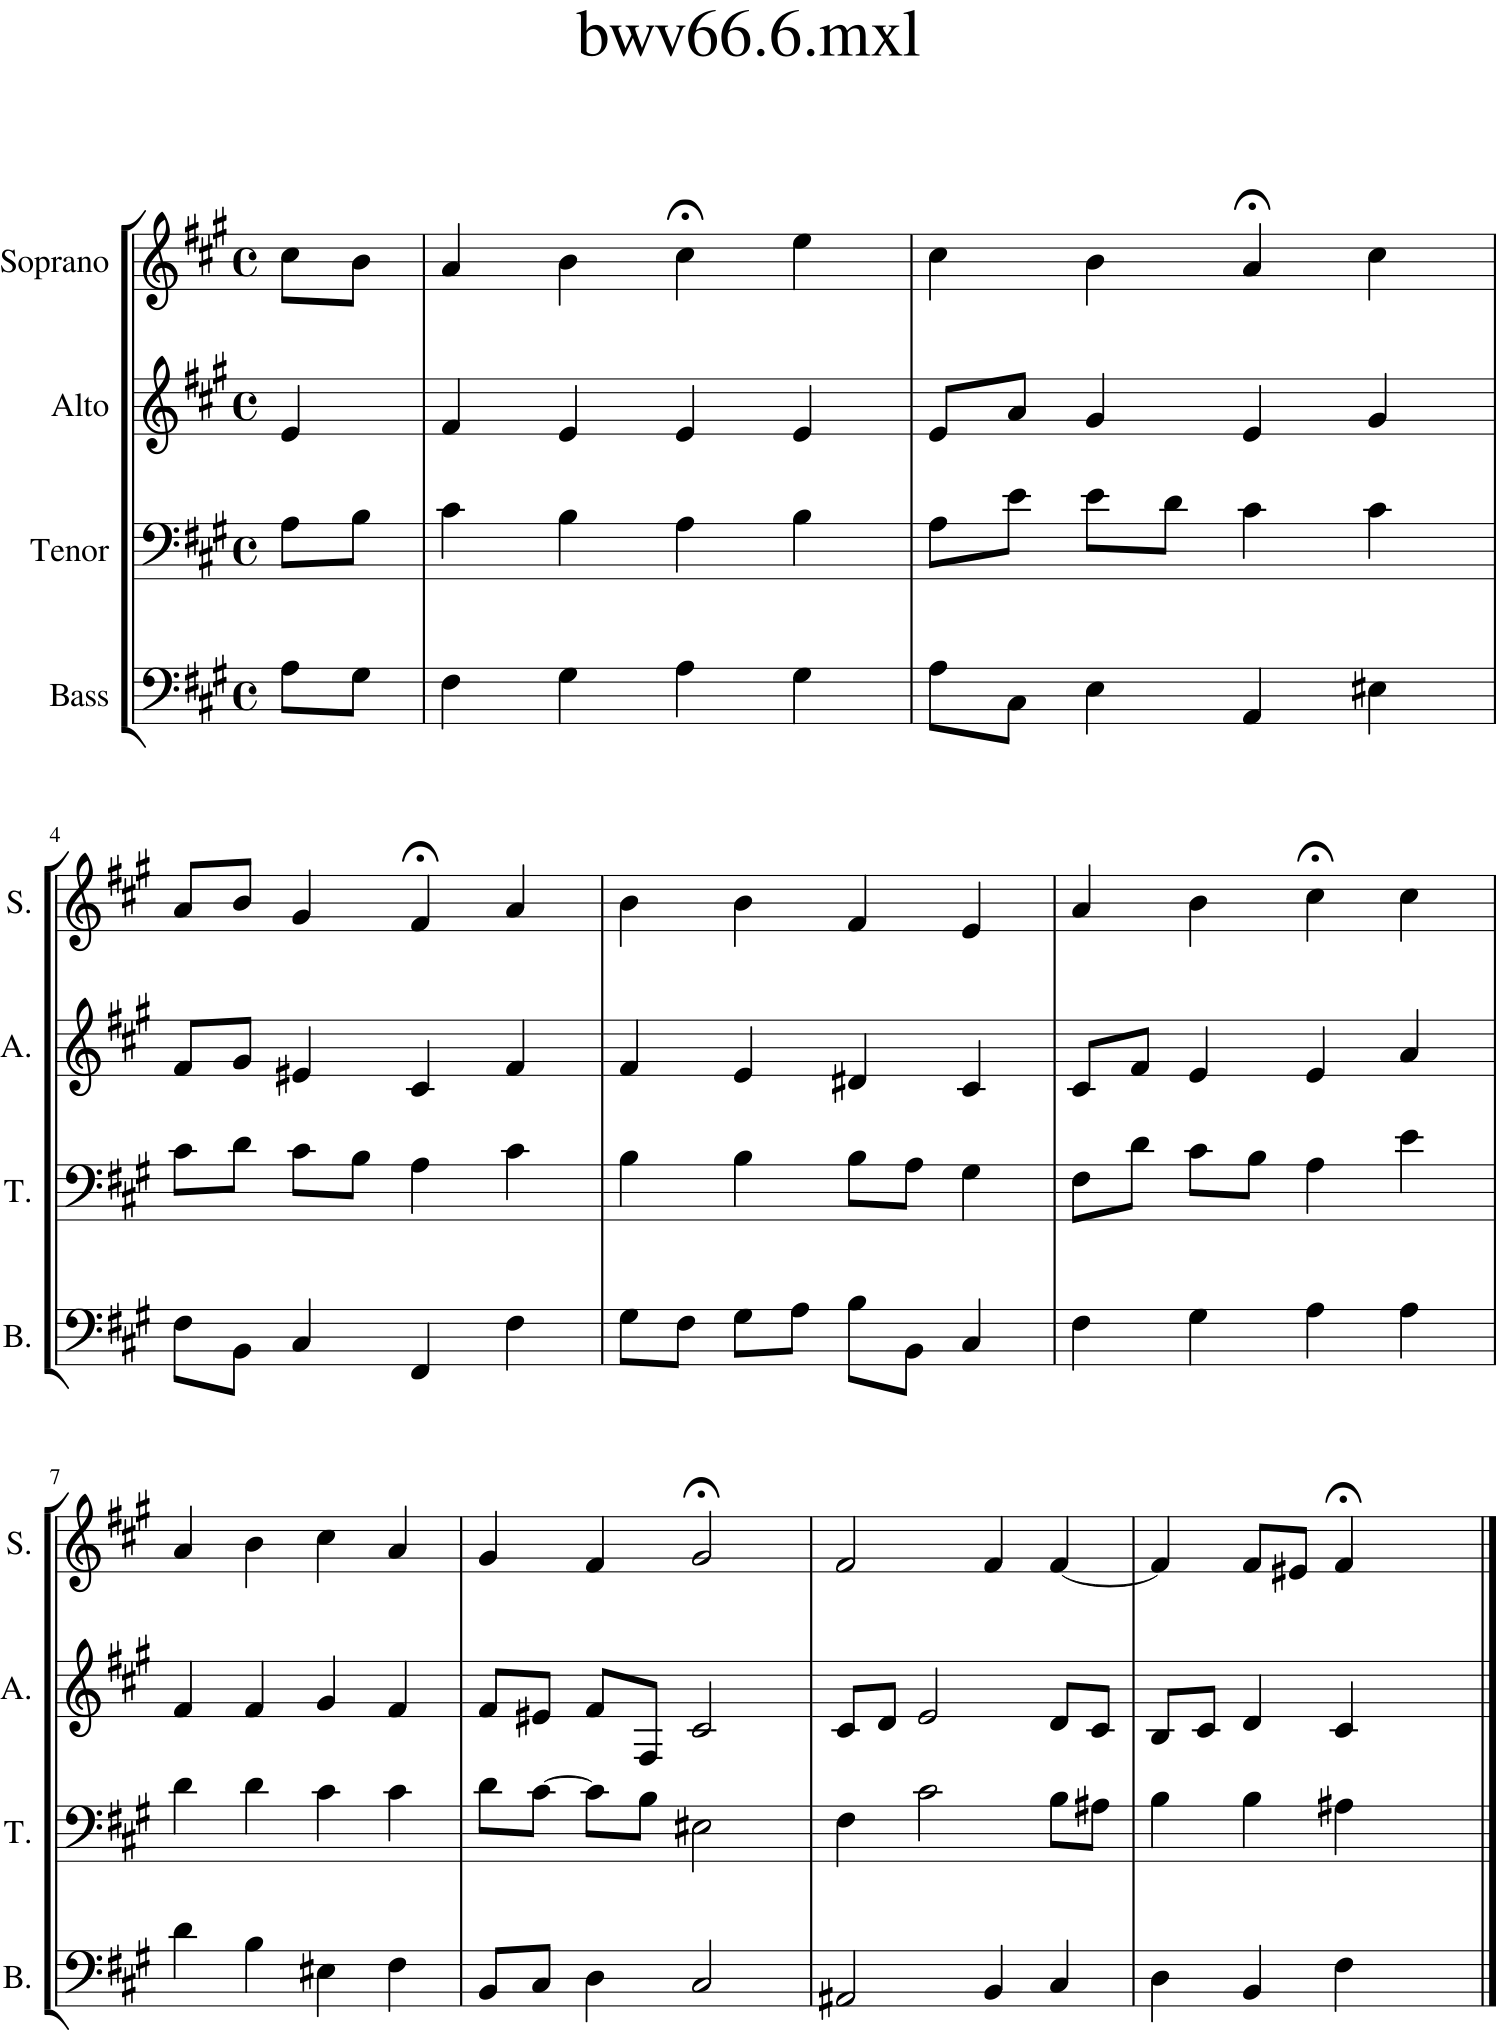

In [31]:
b.show()

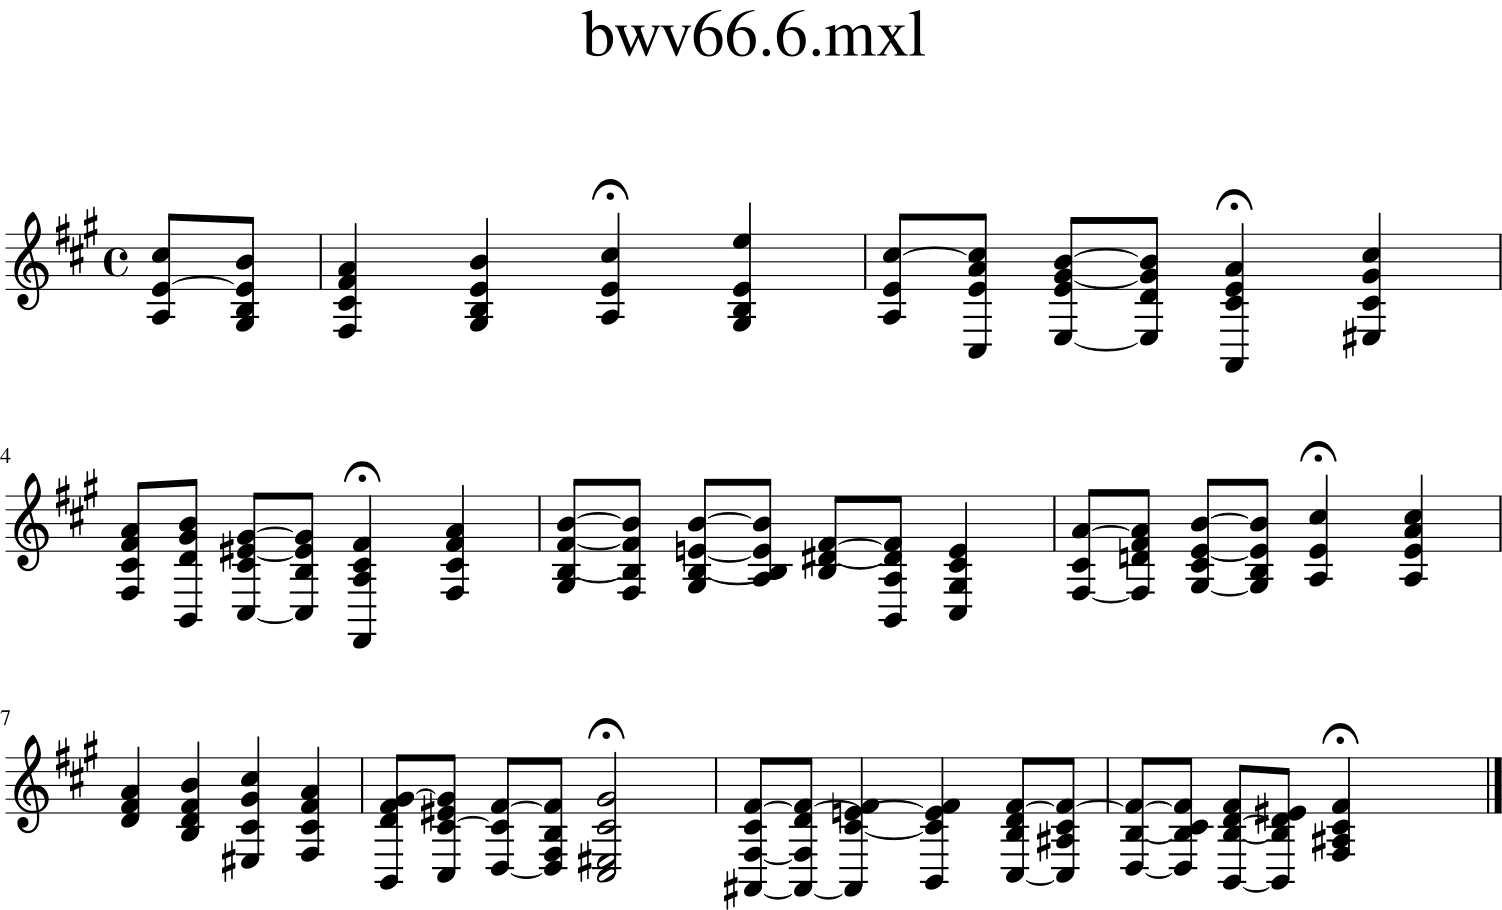

In [32]:
bChords = b.chordify()
bChords.show()

In [33]:
# Find dominant seven
for thisChord in bChords.recurse().getElementsByClass('Chord'):
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord E3 D4 G#4 B4>
3 2 1/2 <music21.chord.Chord C#3 B3 E#4 G#4>
4 3 1/2 <music21.chord.Chord B2 A3 D#4 F#4>
8 2 <music21.chord.Chord A#2 C#4 E4 F#4>


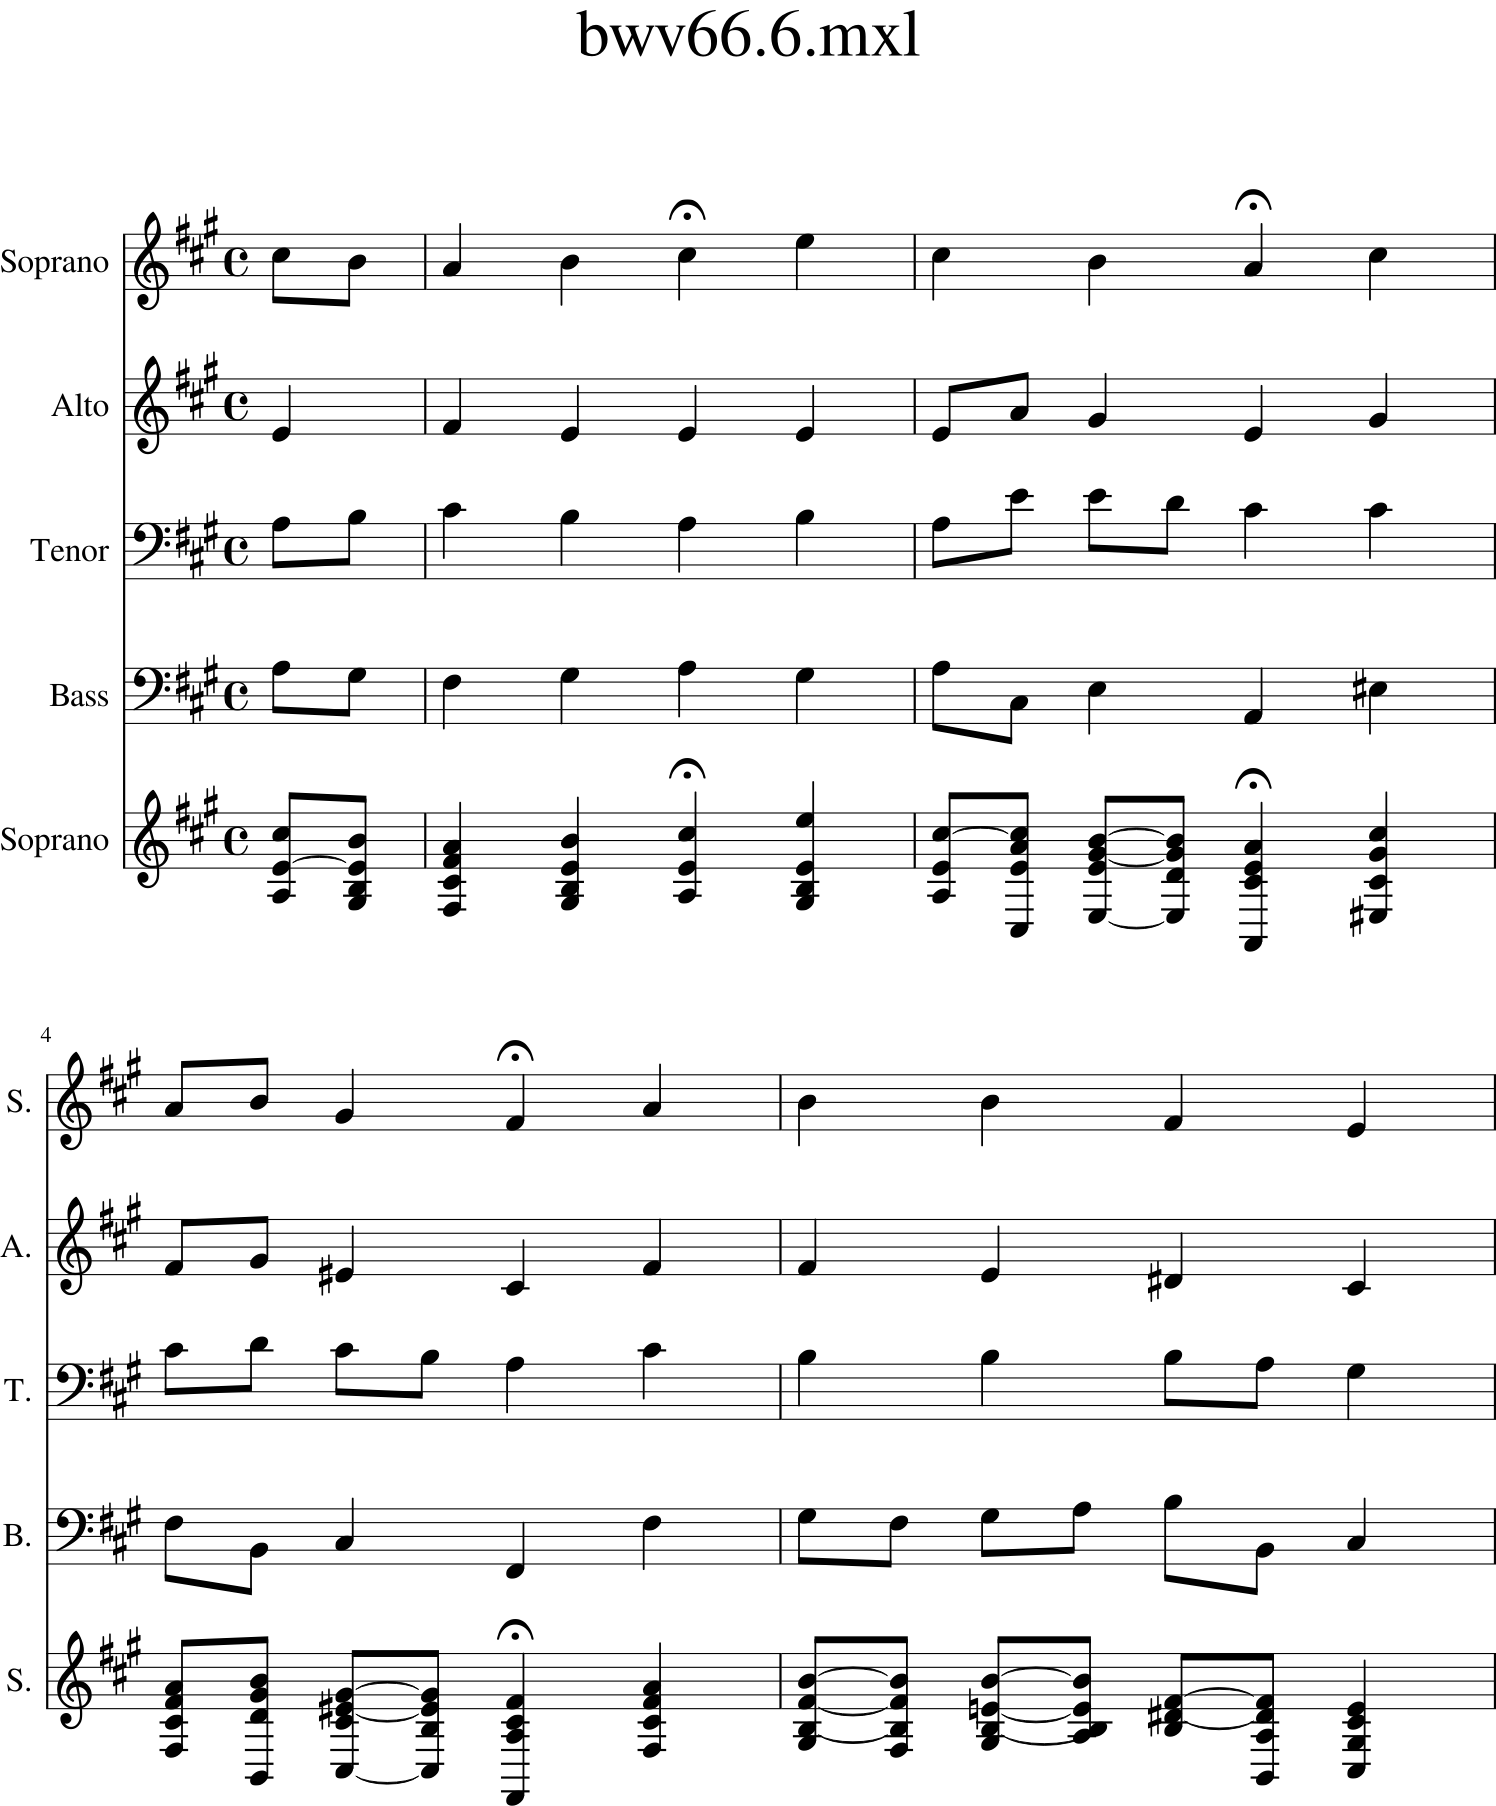

In [34]:
b.insert(0, bChords)
b.measures(0, 4).show()

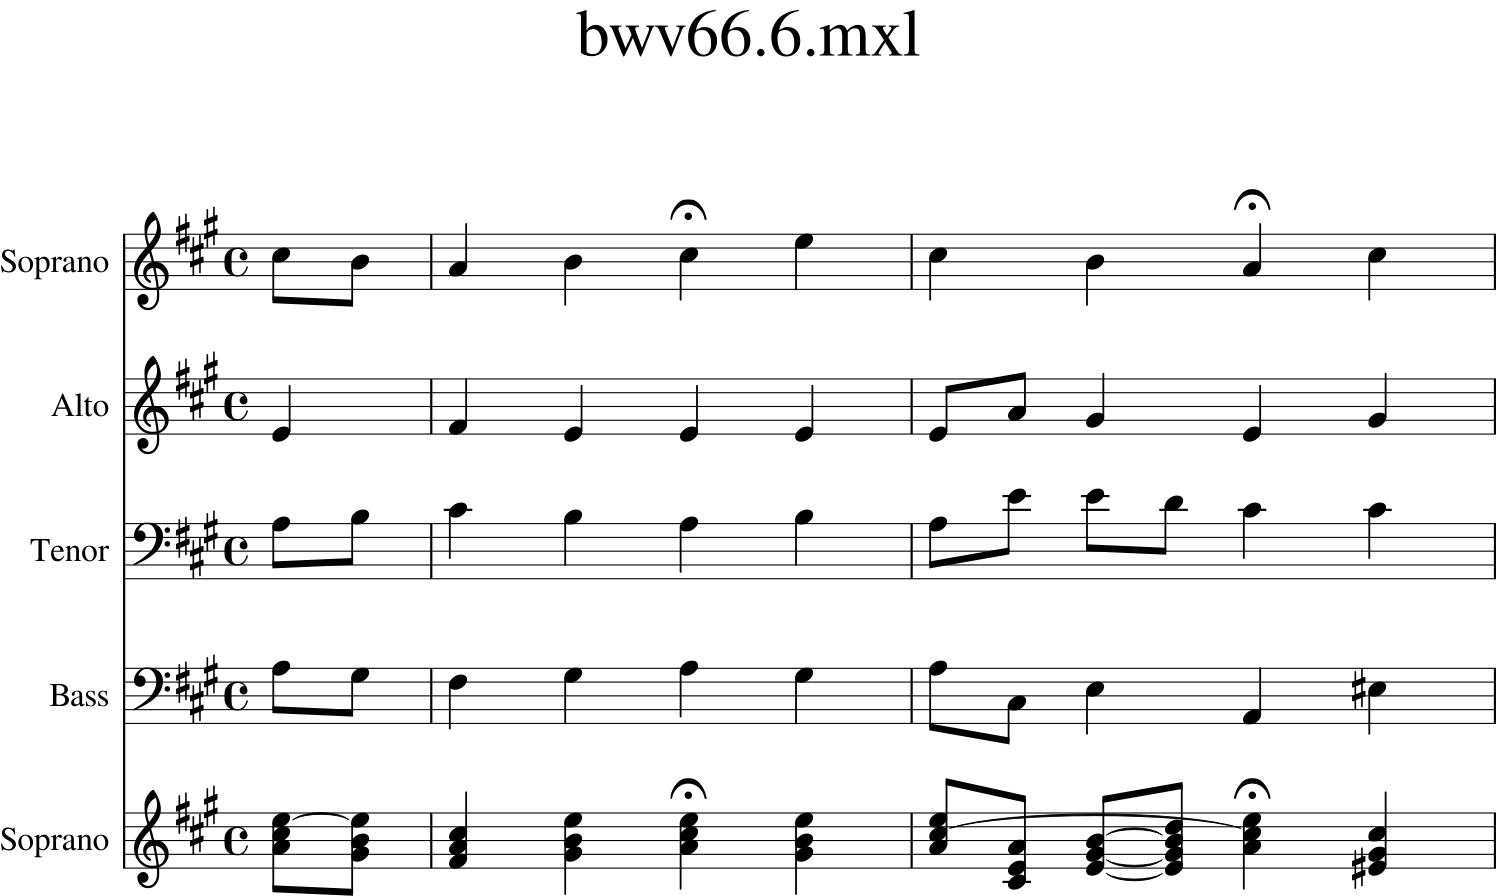

In [35]:
for c in bChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    
b.measures(0, 2).show()

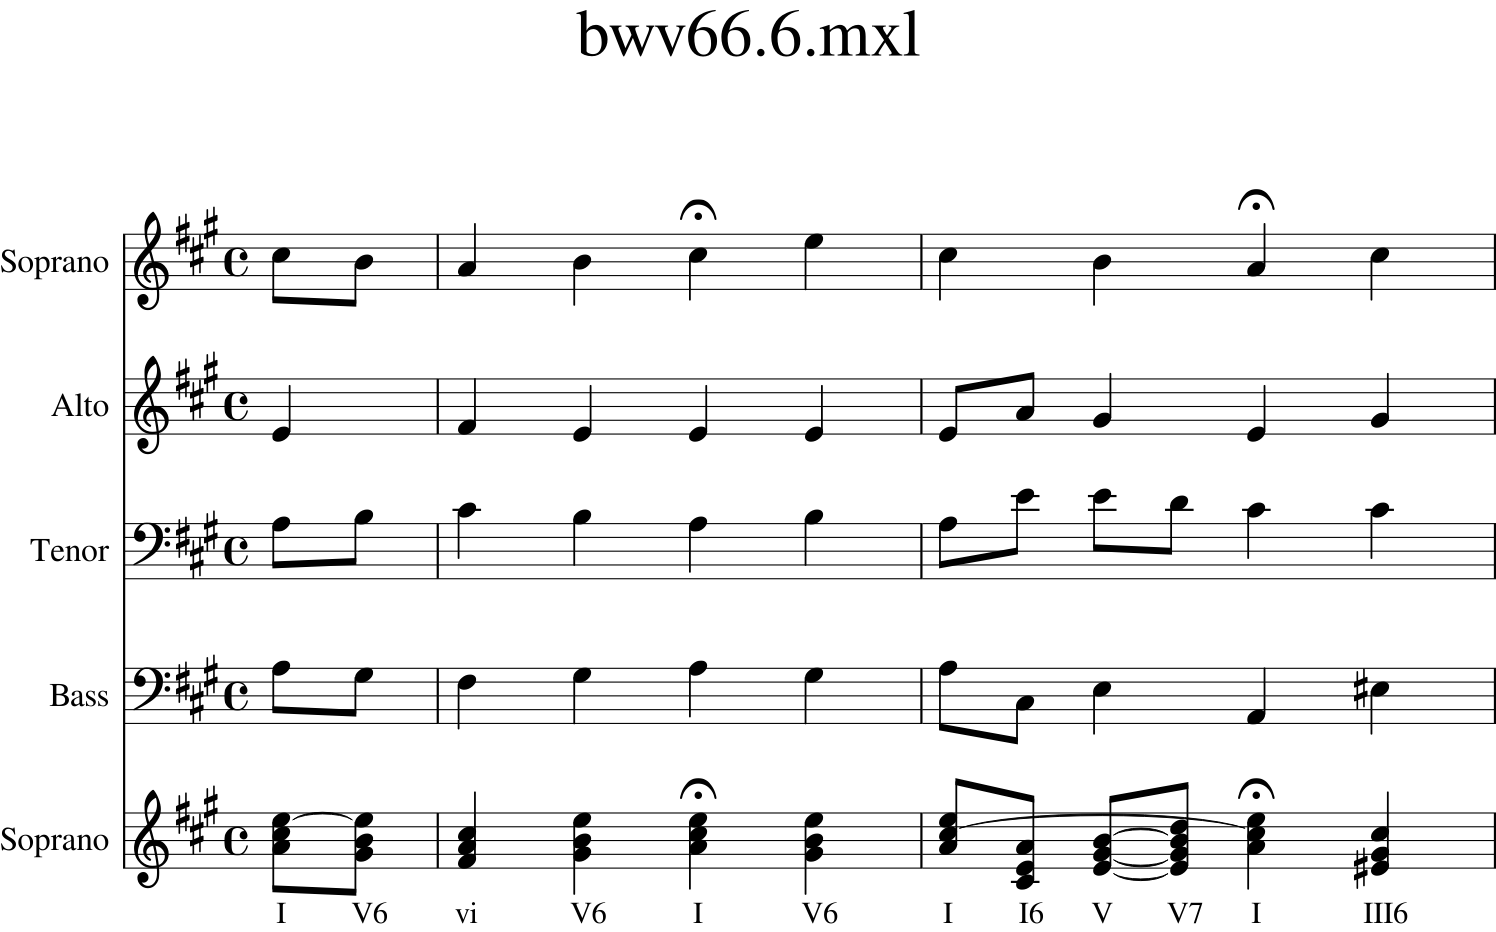

In [38]:
for c in bChords.recurse().getElementsByClass('Chord'):
    rn = mu.roman.romanNumeralFromChord(c, mu.key.Key('A'))
    c.addLyric(str(rn.figure))

b.measures(0, 2).show()

In [39]:
# Progressions

for c in bChords.measures(0, 2).recurse():
    if 'Chord' not in c.classes:
        continue
    print(c.lyric, end=' ')

I V6 vi V6 I V6 I I6 V V7 I III6 

In [41]:
o = mu.corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
for s in o:
    print(s)

<music21.stream.Score 0x7f0604aaf820>
<music21.stream.Score 0x7f0604d54c40>
<music21.stream.Score 0x7f06049c0a30>
<music21.stream.Score 0x7f06049b9af0>
<music21.stream.Score 0x7f0604910100>


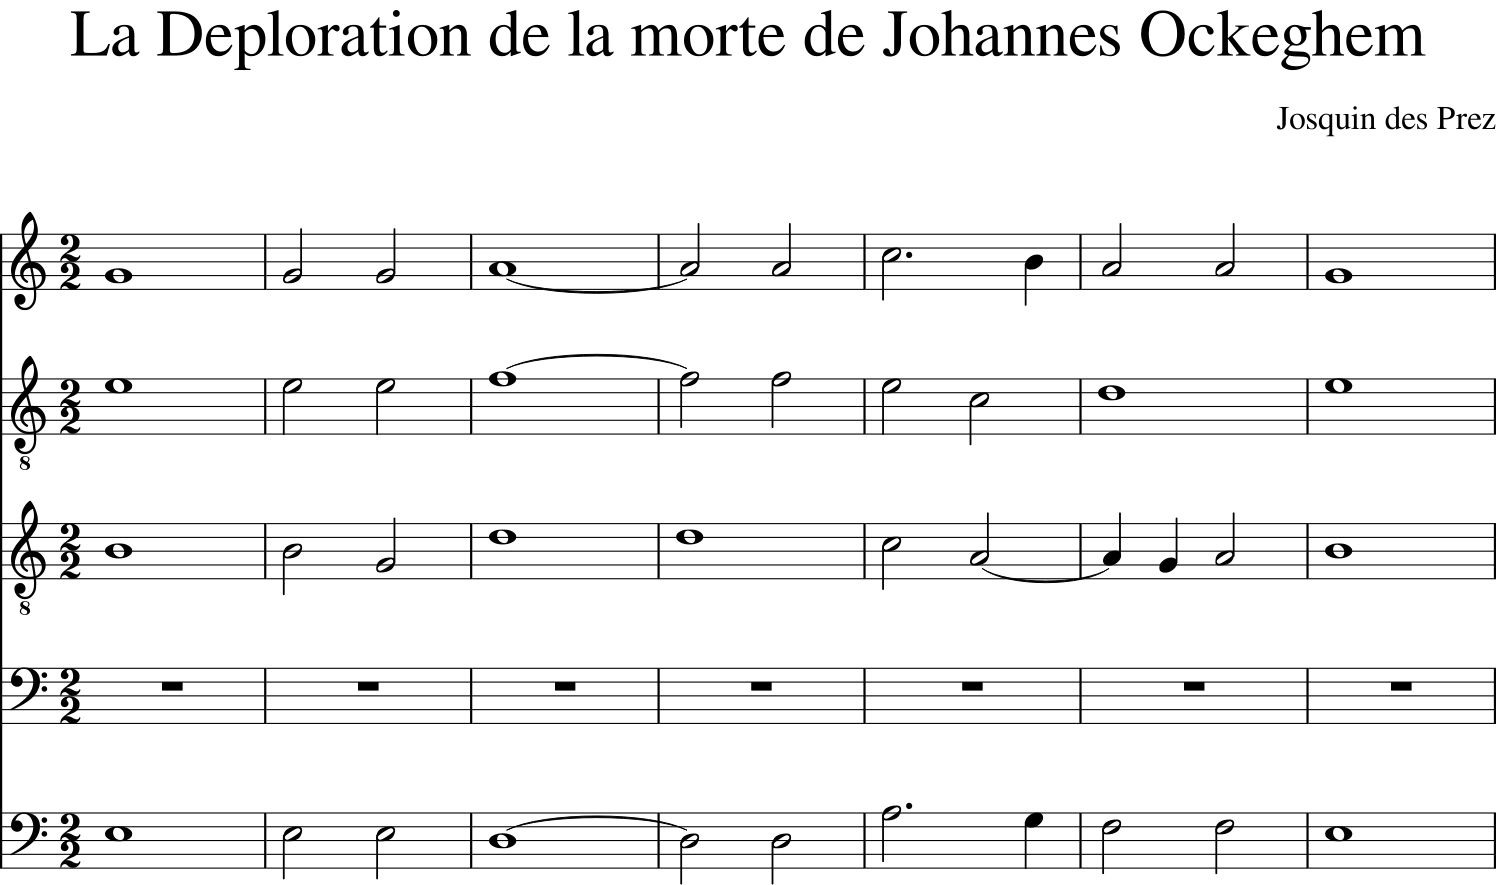

In [42]:
mergedScores = o.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133)
scoreExcerpt.show()

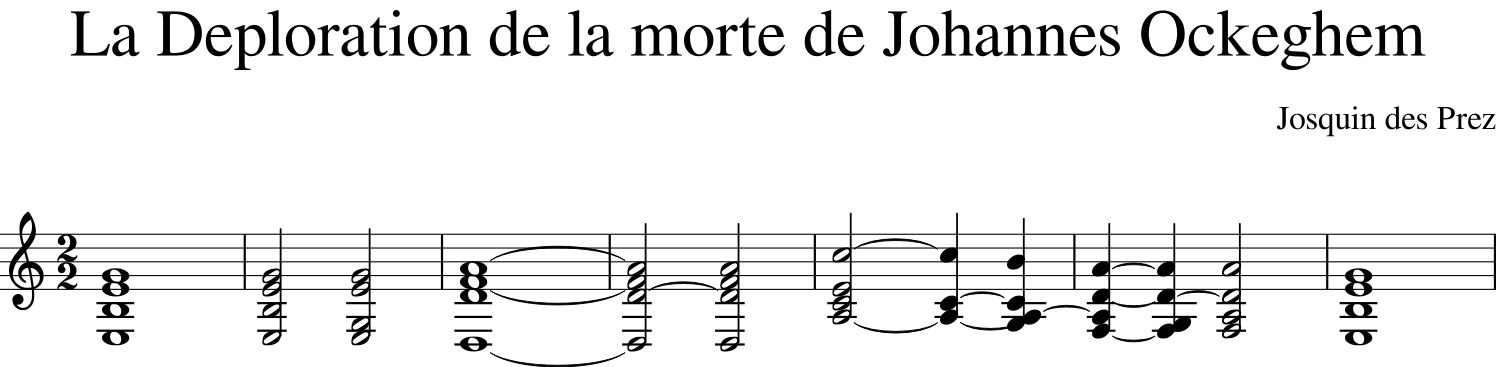

In [43]:
reduction = scoreExcerpt.chordify()
reduction.show()

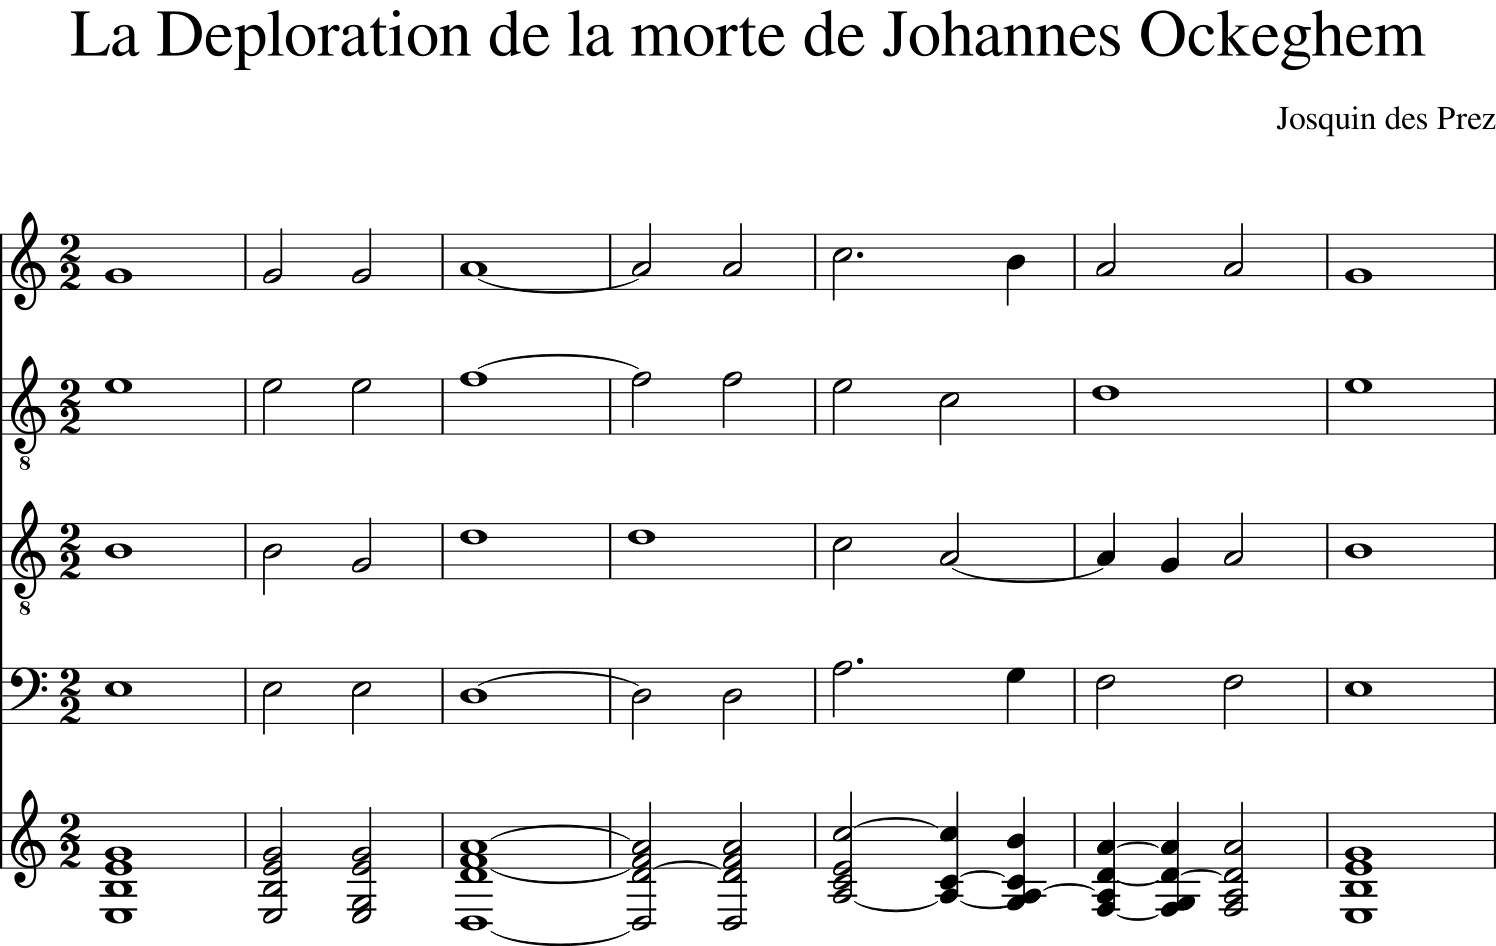

In [44]:
scoreExcerpt.insert(0, reduction)
emptyPart = scoreExcerpt.parts[3]
scoreExcerpt.remove(emptyPart)
scoreExcerpt.show()